In [3]:
import numpy as np 
import pandas as pd

In [4]:
std_perf = pd.read_csv('StudentsPerformance.csv')

In [5]:
std_perf.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
std_perf.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [7]:
std_perf.shape

(1000, 8)

In [8]:
std_perf.groupby('gender').aggregate({'writing score':'mean'})

,writing score
gender,
female,72.467181
male,63.311203


In [9]:
std_perf.size

8000

In [10]:
std_perf.iloc[0:5, 0:3]

,gender,race/ethnicity,parental level of education
0,female,group B,bachelor's degree
1,female,group C,some college
2,female,group B,master's degree
3,male,group A,associate's degree
4,male,group C,some college


In [11]:
std_perf_nam = std_perf.iloc[[0, 3, 5, 7, 9, 10]]

In [12]:
std_perf_nam.index = ['a', 'b', 'c', 'd','e', 'f']

In [13]:
std_perf_nam

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
a,female,group B,bachelor's degree,standard,none,72,72,74
b,male,group A,associate's degree,free/reduced,none,47,57,44
c,female,group B,associate's degree,standard,none,71,83,78
d,male,group B,some college,free/reduced,none,40,43,39
e,female,group B,high school,free/reduced,none,38,60,50
f,male,group C,associate's degree,standard,none,58,54,52


In [14]:
std_perf.loc[std_perf.gender == 'female', ['gender','writing score']]

,gender,writing score
0,female,74
1,female,88
2,female,93
5,female,78
6,female,92
...,...,...
993,female,74
995,female,95
997,female,65
998,female,77


In [15]:
writing_score_mean = std_perf['writing score'].mean()
writing_score_mean

68.054

In [16]:
std_perf.loc[std_perf['writing score'] > writing_score_mean]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
...,...,...,...,...,...,...,...,...
992,female,group D,associate's degree,free/reduced,none,55,76,76
993,female,group D,bachelor's degree,free/reduced,none,62,72,74
995,female,group E,master's degree,standard,completed,88,99,95
998,female,group D,some college,standard,completed,68,78,77


In [17]:
std_perf = std_perf.rename(columns={'parental level of education' : 'parental_level_of_education', 'test preparation course' :' test_preparation_course',
                                    'math score' : 'math_score', 'reading score' : 'reading_score', 'writing score' : 'writing_score'})

In [18]:
std_perf

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [19]:
std_perf.query('(writing_score > 80) & (gender == "female")')

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
6,female,group B,some college,standard,completed,88,95,92
36,female,group D,associate's degree,standard,none,74,81,83
38,female,group D,associate's degree,free/reduced,completed,75,90,88
...,...,...,...,...,...,...,...,...
983,female,group A,some college,standard,completed,78,87,91
984,female,group C,some high school,standard,none,74,75,82
989,female,group D,some college,free/reduced,completed,67,86,83
995,female,group E,master's degree,standard,completed,88,99,95


In [20]:
std_perf[['writing_score', 'lunch']].head()

,writing_score,lunch
0,74,standard
1,88,standard
2,93,standard
3,44,free/reduced
4,75,standard


In [21]:
list(std_perf)

['gender',
 'race/ethnicity',
 'parental_level_of_education',
 'lunch',
 ' test_preparation_course',
 'math_score',
 'reading_score',
 'writing_score']

In [22]:
std_perf.filter(like='1', axis=0)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
1,female,group C,some college,standard,completed,69,90,88
10,male,group C,associate's degree,standard,none,58,54,52
11,male,group D,associate's degree,standard,none,40,52,43
12,female,group B,high school,standard,none,65,81,73
13,male,group A,some college,standard,completed,78,72,70
...,...,...,...,...,...,...,...,...
951,female,group D,some college,standard,completed,75,77,83
961,female,group D,some high school,free/reduced,none,48,54,53
971,male,group C,some high school,standard,completed,78,72,69
981,male,group D,some high school,standard,none,81,78,78


In [23]:
std_perf_mean_scores = std_perf.groupby(['gender','race/ethnicity']).aggregate({'math_score': 'mean', 'reading_score':'mean'})

In [24]:
std_perf_mean_scores

math_score  reading_score
gender race/ethnicity                           
female group A          58.527778      69.000000
       group B          61.403846      71.076923
       group C          62.033333      71.944444
       group D          65.248062      74.046512
       group E          70.811594      75.840580
male   group A          63.735849      61.735849
       group B          65.930233      62.848837
       group C          67.611511      65.424460
       group D          69.413534      66.135338
       group E          76.746479      70.295775

In [25]:
std_perf_mean_scores.loc[[('male','group A'),('female', 'group B')]]

,,math_score,reading_score
gender,race/ethnicity,,
male,group A,63.735849,61.735849
female,group B,61.403846,71.076923


In [26]:
std_perf.sort_values(['gender','math_score'], ascending=False) \
    .groupby('gender').head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
149,male,group E,associate's degree,free/reduced,completed,100,100,93
623,male,group A,some college,standard,completed,100,96,86
625,male,group D,some college,standard,completed,100,97,99
916,male,group E,bachelor's degree,standard,completed,100,100,100
306,male,group E,some college,standard,completed,99,87,81
451,female,group E,some college,standard,none,100,92,97
458,female,group E,bachelor's degree,standard,none,100,100,100
962,female,group E,associate's degree,standard,none,100,100,100
114,female,group E,bachelor's degree,standard,completed,99,100,100
263,female,group E,high school,standard,none,99,93,90


In [27]:
std_perf['total_score'] = std_perf.math_score + std_perf.reading_score + std_perf.writing_score

In [28]:
std_perf

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282
996,male,group C,high school,free/reduced,none,62,55,55,172
997,female,group C,high school,free/reduced,completed,59,71,65,195
998,female,group D,some college,standard,completed,68,78,77,223


In [29]:
std_perf = std_perf.assign(total_score_log = np.log(std_perf.total_score))

In [30]:
std_perf.drop(['total_score','lunch'], axis=1)

,gender,race/ethnicity,parental_level_of_education,test_preparation_course,math_score,reading_score,writing_score,total_score_log
0,female,group B,bachelor's degree,none,72,72,74,5.384495
1,female,group C,some college,completed,69,90,88,5.509388
2,female,group B,master's degree,none,90,95,93,5.627621
3,male,group A,associate's degree,none,47,57,44,4.997212
4,male,group C,some college,none,76,78,75,5.433722
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,completed,88,99,95,5.641907
996,male,group C,high school,none,62,55,55,5.147494
997,female,group C,high school,completed,59,71,65,5.273000
998,female,group D,some college,completed,68,78,77,5.407172


In [31]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [32]:
%matplotlib inline

<AxesSubplot:>

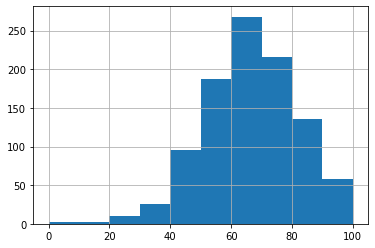

In [33]:
std_perf.math_score.hist()

<AxesSubplot:xlabel='math_score', ylabel='writing_score'>

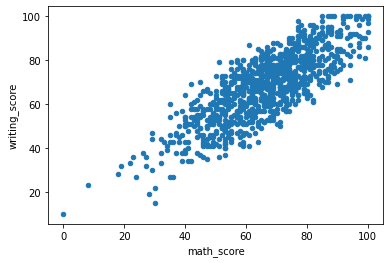

In [34]:
std_perf.plot.scatter(x='math_score', y='writing_score')

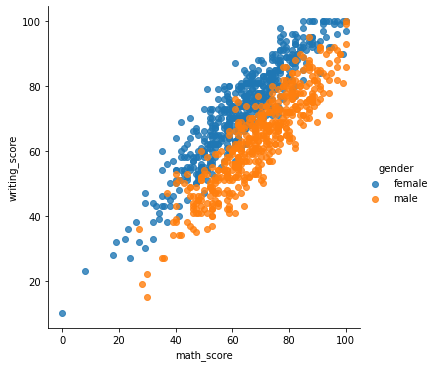

In [35]:
ax = sns.lmplot(x='math_score', y='writing_score', hue='gender', fit_reg=False, data=std_perf)

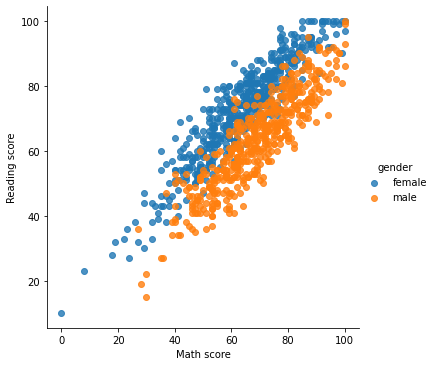

In [38]:
ax = sns.lmplot(x='math_score', y='writing_score', hue='gender', fit_reg=False, data=std_perf)
ax.set_xlabels('Math score')
ax.set_ylabels('Reading score')
